In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

import warnings
warnings.simplefilter('ignore')

In [9]:
dataset = pd.read_csv('../dataset/ToyotaCorolla/ToyotaCorolla.csv')
dataset

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015


In [10]:
dataset.count()

Price        1436
Age          1436
KM           1436
FuelType     1436
HP           1436
MetColor     1436
Automatic    1436
CC           1436
Doors        1436
Weight       1436
dtype: int64

In [11]:
dataset.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [12]:
dataset.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [21]:
dataset.value_counts()

Price  Age  KM      FuelType  HP   MetColor  Automatic  CC    Doors  Weight
24950  8    13253   Diesel    116  1         0          2000  5      1320      2
4350   44   158320  Diesel    69   0         0          1800  5      1110      1
10950  54   71725   Petrol    110  1         0          1600  4      1035      1
       57   80470   Petrol    110  0         0          1600  5      1085      1
            61682   Petrol    110  0         0          1600  3      1050      1
                                                                              ..
8950   54   149329  Diesel    72   1         0          2000  5      1135      1
            64000   Petrol    97   1         0          1400  3      1025      1
            61000   Diesel    69   0         0          2000  5      1140      1
       53   115113  Petrol    97   1         0          1400  3      1025      1
32500  4    1       Diesel    116  0         0          2000  5      1480      1
Name: count, Length: 1435, dtype:

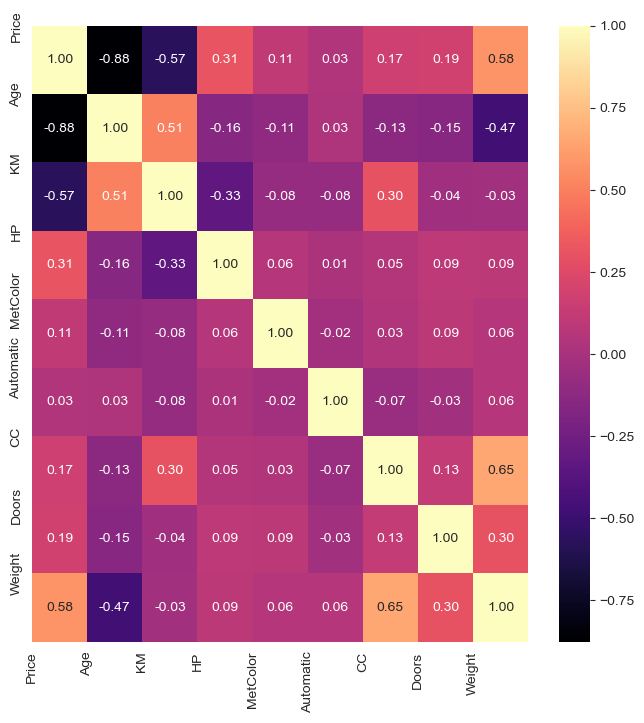

In [26]:
corr = dataset[['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight']].corr()

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

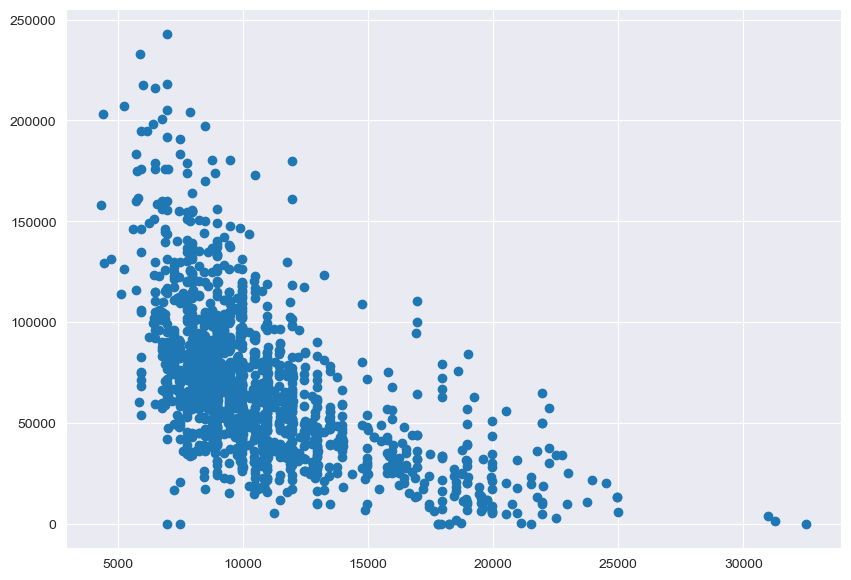

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(x=dataset['Price'], y=dataset['KM'])
plt.show()

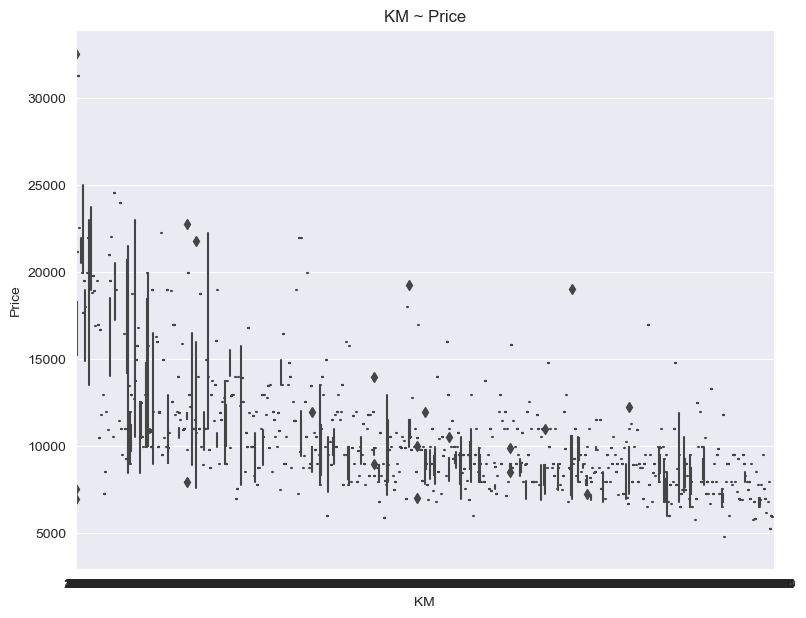

In [41]:
plt.figure(figsize=(9, 7))

sns.boxplot(x=dataset['KM'], y=dataset['Price'], data=dataset)

plt.xlabel('KM')
plt.ylabel('Price')
plt.title('KM ~ Price')
# plt.legend()
plt.show()

In [42]:
dataset = pd.get_dummies(dataset)
dataset.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,False,True,False
1,13750,23,72937,90,1,0,2000,3,1165,False,True,False
2,13950,24,41711,90,1,0,2000,3,1165,False,True,False
3,14950,26,48000,90,0,0,2000,3,1165,False,True,False
4,13750,30,38500,90,0,0,2000,3,1170,False,True,False


1. 'X = dataset.drop('Price', axis=1).values'와
2. 'X = dataset.drop('Price', axis=1)'이 다른점
 - 전자는 모델에 제공될 기능 매트릭스를 준비하는 데 자주 사용되는 반면,
 - 후자는 DataFrame 형식을 유지하려는 추가 데이터 처리 단계에 사용될 수 있습니다.

3. '.reshape(-1,1)' 은 배열을 하나의 열과 필요한 만큼의 행을 포함하는 2차원 배열로 변환하는 데 사용됩니다. 이는 X 특성과 대상 y가 특정 모양일 것으로 예상하는 scikit-learn 모델의 일반적인 요구 사항입니다.

In [ ]:
'''
array([13500, 13750, 13950, ...,  8500,  7250,  6950], dtype=int64)
'''
# reshape(-1,1) 전후 비교
'''
array([[13500],
       [13750],
       [13950],
       ...,
       [ 8500],
       [ 7250],
       [ 6950]], dtype=int64)
'''

In [49]:
X = dataset.drop('Price', axis=1).values
y = dataset.iloc[:,0].values.reshape(-1,1)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=42
                                                    )

In [52]:
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (1077, 11)
Shape of X_test : (359, 11)
Shape of y_train : (1077, 1)
Shape of y_test : (359, 1)


In [53]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

## 선형식 지표 구해보기 
 - cross validation score
 - R2 score
 - RMSE 

In [55]:
from sklearn.metrics import r2_score

cv_linear = cross_val_score(estimator=regressor_linear, X=X_train, y=y_train, cv=10)

y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

In [57]:
print("CV : ",cv_linear.mean())
print(f'R2_score (train) : {r2_score_linear_train}')
print(f'R2_score (test) : {r2_score_linear_test}')
print(f'RMSE : {rmse_linear}')

CV :  0.8480754345159047
R2_score (train) : 0.8702260786694702
R2_score (test) : 0.8621869690956065
RMSE : 1398.4596051422202


## 다항식(2차) 만들기

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)

regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [59]:
cv_poly2 = cross_val_score(estimator=regressor_poly2, X=X_train, y=y_train, cv=10)

y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

rmse_poly2 = np.sqrt(mean_squared_error(y_test, y_pred_poly2_test))

In [62]:
print(f'CV : {cv_poly2.mean()}')
print(f'R2_score (train) : {r2_score_poly2_train}')
print(f'R2_score (test) : {r2_score_poly2_test}')
print(f'RMSE : {rmse_poly2}')

CV : 0.8480754345159047
R2_score (train) : 0.9157086185585269
R2_score (test) : 0.7619828287331718
RMSE : 1837.8452019166743


### pipe

In [63]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [64]:
steps = [
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Ridge(alpha=1777, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', Ridge(alpha=1777))])

## Ridge

In [66]:
from sklearn.metrics import r2_score

cv_ridge = cross_val_score(estimator=ridge_pipe, X=X_train, y=y_train.ravel(), cv=10)

y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

In [67]:
print(f'CV : {cv_ridge.mean()}')
print(f'R2_score (train) : {r2_score_ridge_train}')
print(f'R2_score (test) : {r2_score_ridge_test}')
print(f'RMSE : {rmse_ridge}')

CV : 0.7785178588873449
R2_score (train) : 0.87000985560043
R2_score (test) : 0.869780644870652
RMSE : 1359.3852529159894


## Lasso

In [68]:
from sklearn.linear_model import Lasso

steps = [
    ('scaler', StandardScaler()),
    ('poly' , PolynomialFeatures(degree=3)),
    ('model', Lasso(alpha=2.36, fit_intercept=True, tol=0.0199, max_iter=2000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', Lasso(alpha=2.36, max_iter=2000, tol=0.0199))])

In [69]:
cv_lasso = cross_val_score(estimator=lasso_pipe, X=X_train, y=y_train, cv=10)

y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

In [70]:
print(f'CV : {cv_lasso.mean()}')
print(f'R2_score (train) : {r2_score_lasso_train}')
print(f'R2_score (test) : {r2_score_lasso_test}')
print(f'RMSE : {rmse_lasso}')

CV : 0.7427712620107962
R2_score (train) : 0.9273633923675705
R2_score (test) : 0.9022945020939633
RMSE : 1177.5091354603426


## Support Vector Regression

In [71]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

In [72]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel='rbf', gamma='scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

SVR()

In [75]:
cv_svr = cross_val_score(estimator=regressor_svr, X=X_scaled, y=y_scaled.ravel(), cv=10)

y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)).reshape(-1,1))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)).reshape(-1,1))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr_test))

In [76]:
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV:  0.8717816523882803
R2_score (train):  0.9037407869672545
R2_score (test):  0.8360054677807699
RMSE:  1525.5254886040095


In [77]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [78]:
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.8193262156045742
R2_score (train):  1.0
R2_score (test):  0.8444979033079358
RMSE:  1485.5008637345145


In [79]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 1200, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=1200, random_state=0)

In [80]:
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8956356411408478
R2_score (train):  0.986168176541885
R2_score (test):  0.9159155034776082
RMSE:  1092.352351998201


In [81]:
models = [
    ('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
    ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
    ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
    ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
    ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
    ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
    ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
]

In [82]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,1398.459605,0.870226,0.862187,0.848075
1,Polynomial Regression (2nd),1837.845202,0.915709,0.761983,0.848075
2,Ridge Regression,1359.385253,0.870010,0.869781,0.778518
3,Lasso Regression,1177.509135,0.927363,0.902295,0.742771
4,Support Vector Regression,1525.525489,0.903741,0.836005,0.871782
5,Decision Tree Regression,1485.500864,1.000000,0.844498,0.819326
6,Random Forest Regression,1092.352352,0.986168,0.915916,0.895636


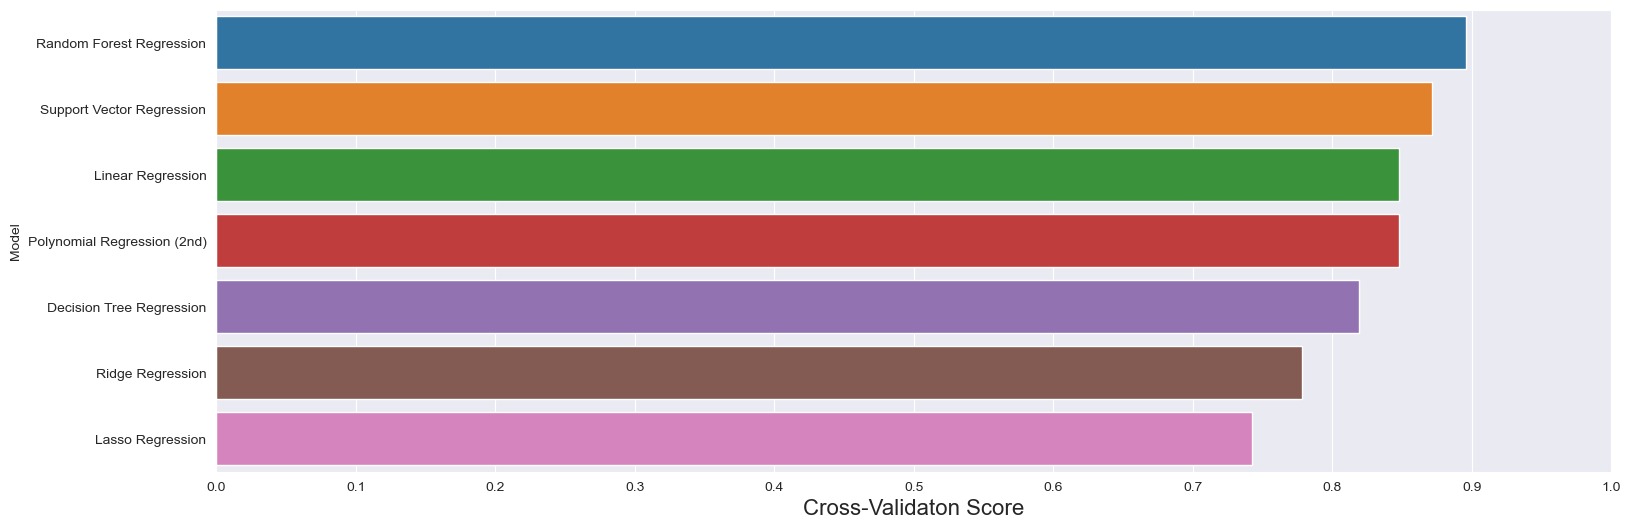

In [83]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

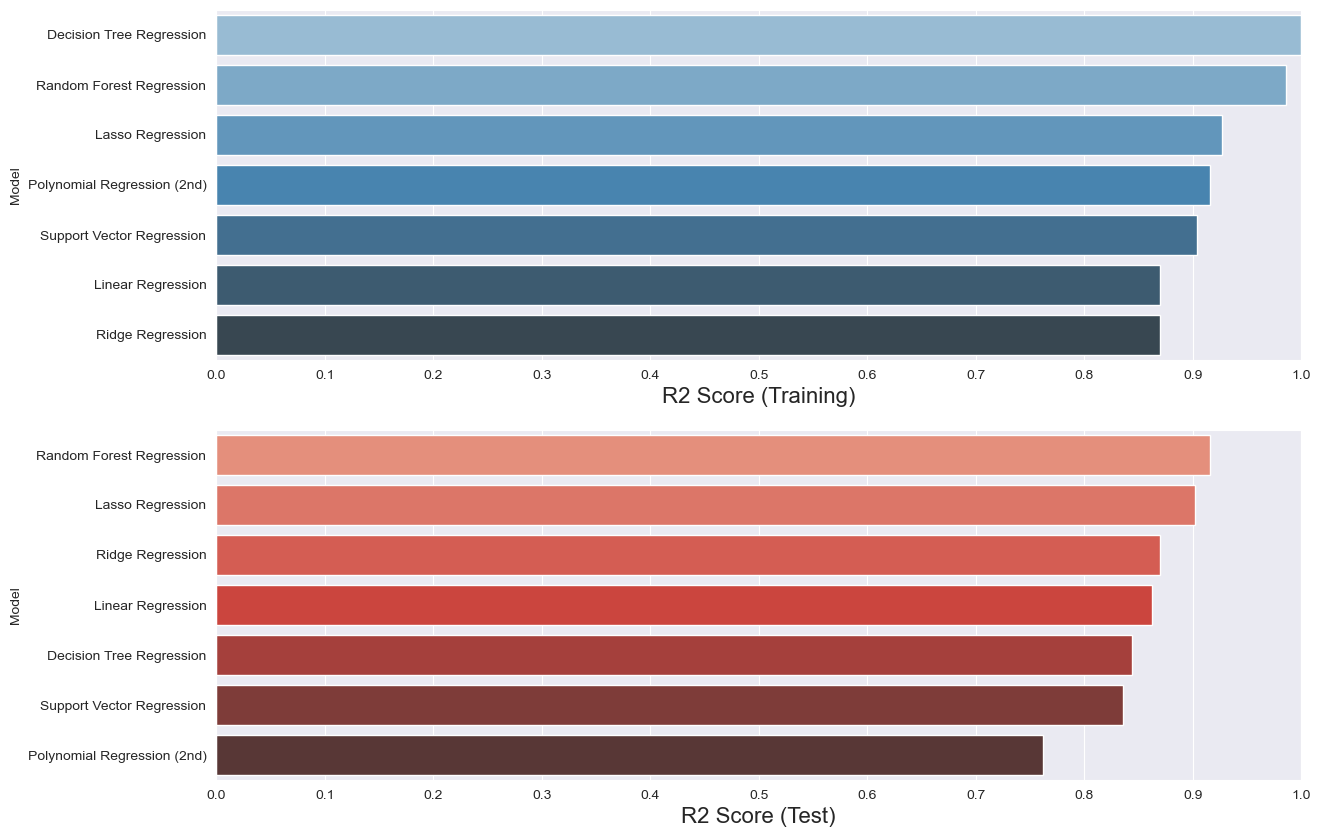

In [84]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

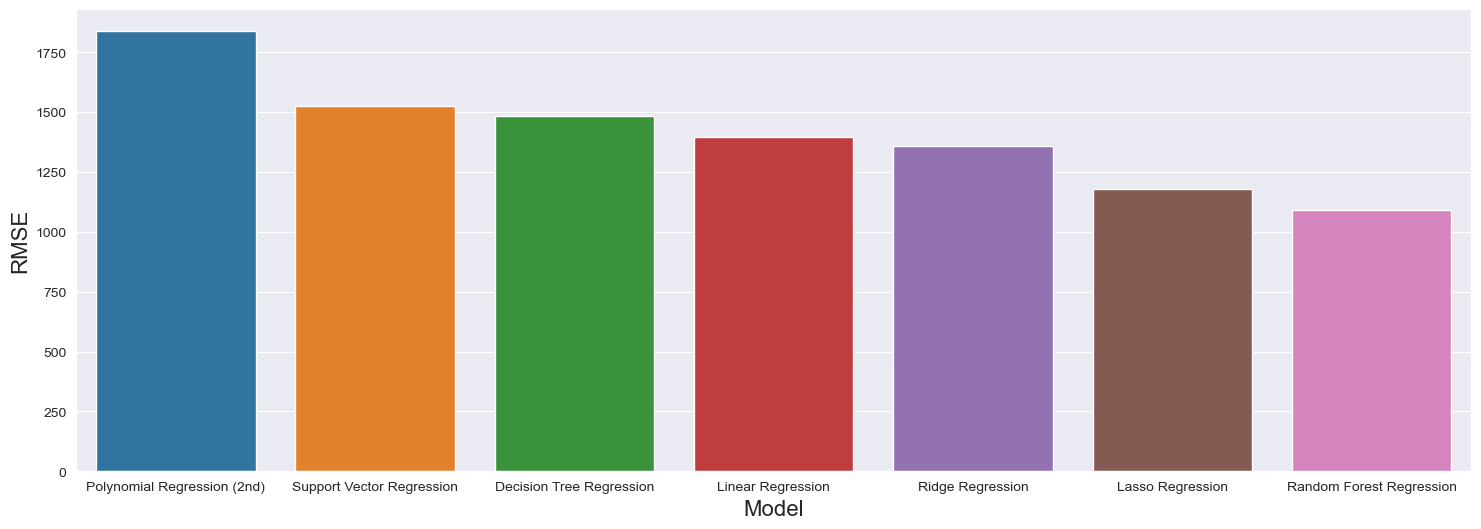

In [85]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()